In [1]:
import sys
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
sys.path.append('../../')

import numpy as np
import random
from IPython.display import Image

import torch
from torch.utils.data import DataLoader

from torchvision.datasets import CIFAR10

from utils import show_first_batch, transform_data_for_show, show_forward, training, show_images, generate_new_images
from diffusion_models.ddpm import CustomDiffusionModel
from reverse_models.unet.unet import Unet
from metrics.rate_score import rate_score
from metrics.inception_score import inception_score
from metrics.fid_score import fid_score



SEED = 0
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [2]:
min_beta, max_beta = 10 ** -4, 0.02

# Read  and prepare dataset

Files already downloaded and verified


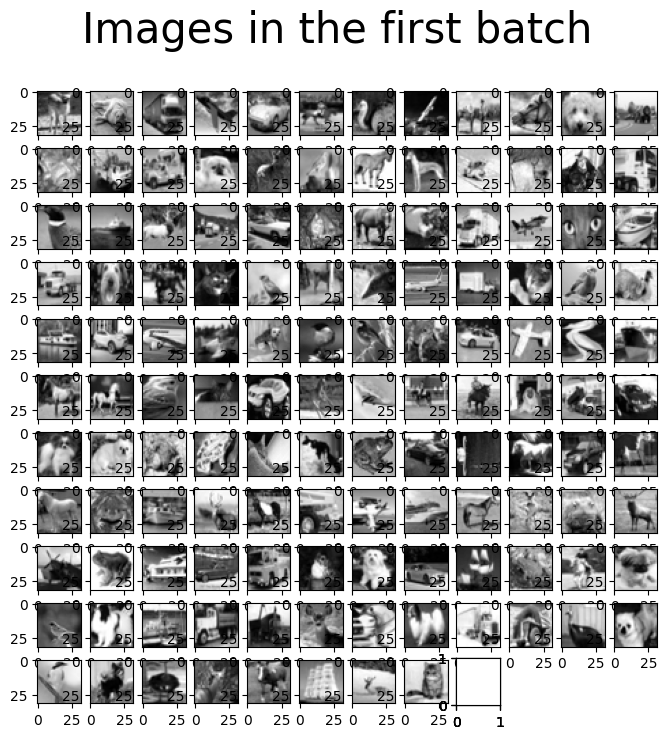

In [3]:
dataset = transform_data_for_show(CIFAR10, store_path='../../datasets')
train_dataloader = DataLoader(dataset, batch_size=128, num_workers=0, shuffle=True)
show_first_batch(train_dataloader)

In [4]:
size_pictures = next(iter(train_dataloader))[0].size()
image_channels = size_pictures[1]
hw = size_pictures[2]

# N_STEPS = 1000

In [5]:
n_steps = 1000

ddpm = CustomDiffusionModel(Unet(hw), n_steps=n_steps, min_beta=min_beta, max_beta=max_beta, device=device)
#show_forward(ddpm, train_dataloader, device)

### Train

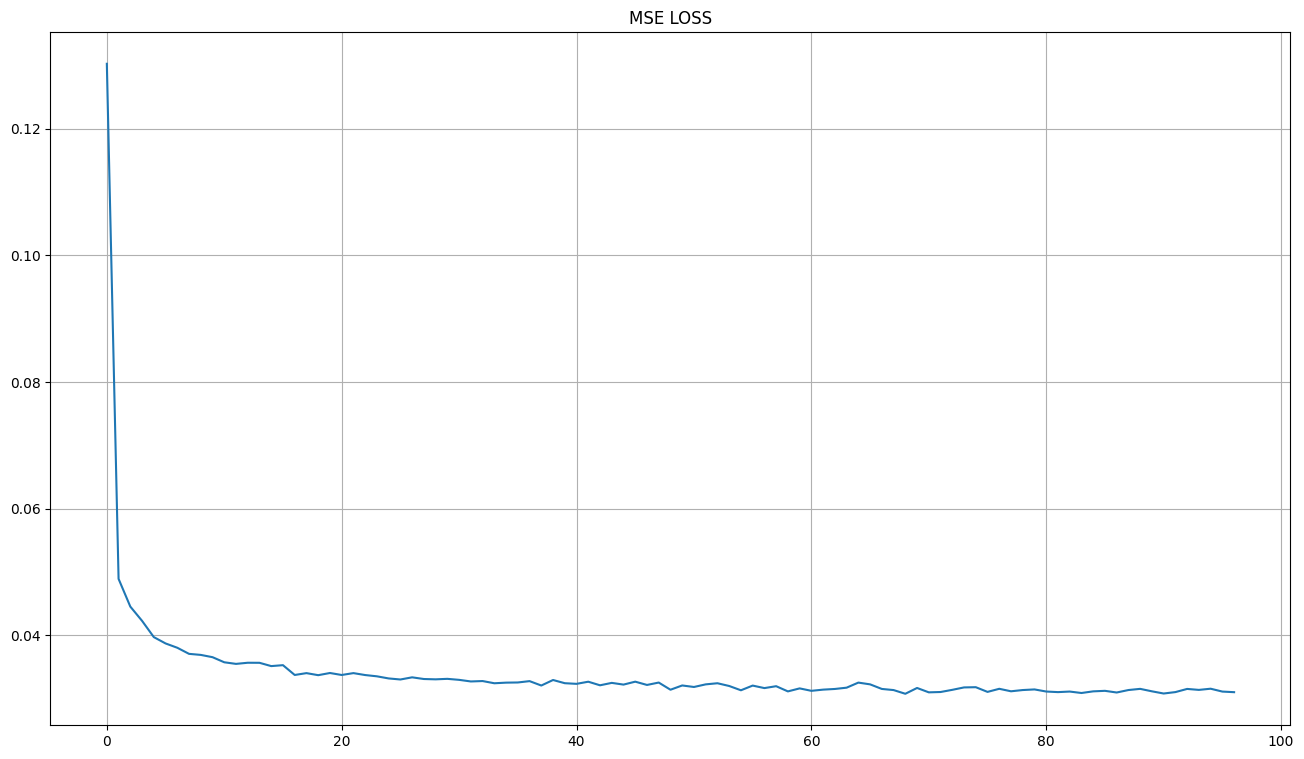

Loss at epoch 97: 0.03102


Epoch 98/100:   0%|          | 0/391 [00:00<?, ?it/s]

Loss at epoch 98: 0.03087


Epoch 99/100:   0%|          | 0/391 [00:00<?, ?it/s]

Loss at epoch 99: 0.03074 --> Best model ever (stored)


Epoch 100/100:   0%|          | 0/391 [00:00<?, ?it/s]

Loss at epoch 100: 0.03108


In [6]:
optimizer = torch.optim.Adam(ddpm.parameters(), lr=2 * 10**(-4))     
training(ddpm, train_dataloader, display=True, n_epochs=100, upset_epoch=4, device=device, optimizer=optimizer, store_path = '../../model_weights/ddpm_cifar_steps_1000.pt') 

### Test

In [6]:
store_path = '../../model_weights/ddpm_cifar_steps_1000.pt'

best_model = CustomDiffusionModel(Unet(hw), n_steps=n_steps, device=device)
best_model.load_state_dict(torch.load(store_path, map_location=device))
best_model.eval()
print("Model loaded")

Model loaded


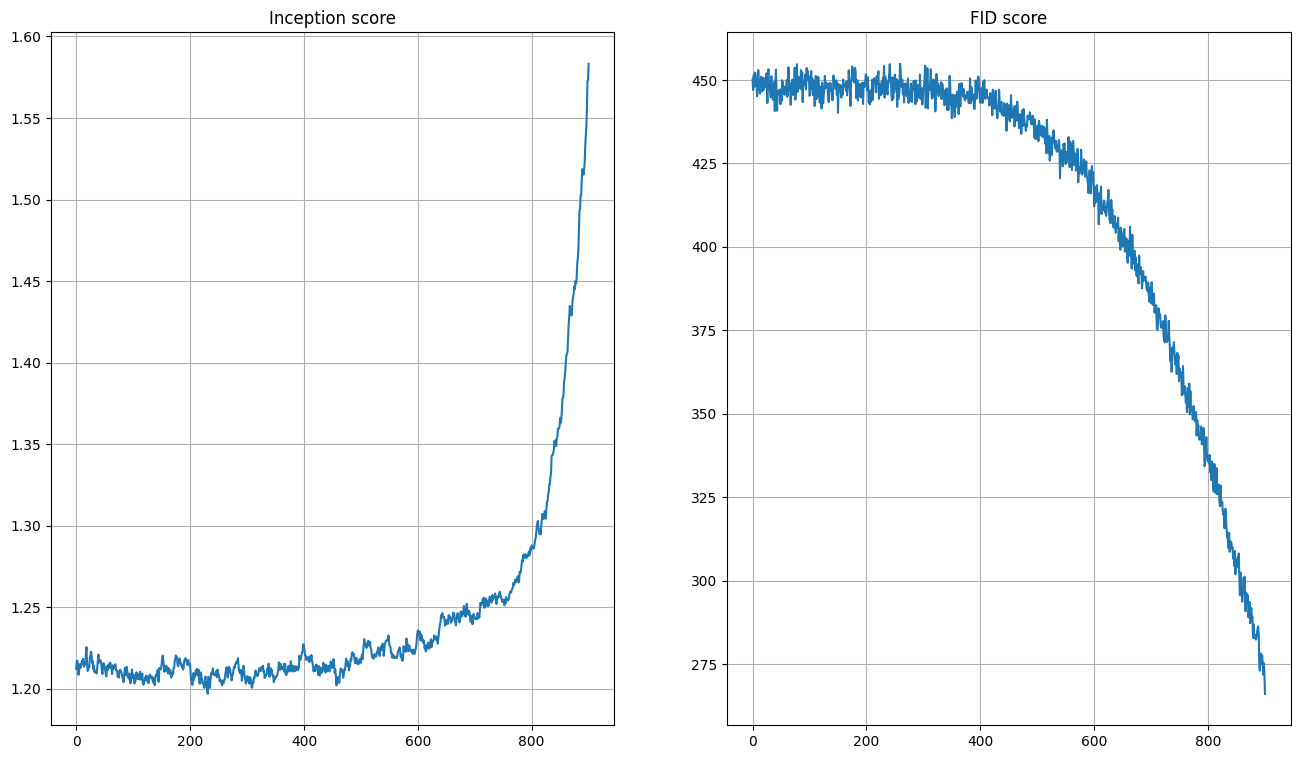

In [8]:
print("Generating new images")
generated = generate_new_images(
        best_model,
        n_samples=1000,
        show_metrics_pes_step=True,
        record_gif=False,
        dataset=dataset,
        device=device,
        gif_name="../../pictures/cifar_1000.gif",
        c=3, h=32, w=32
    )
#show_images(generated, title="Final result")

## Visualize 

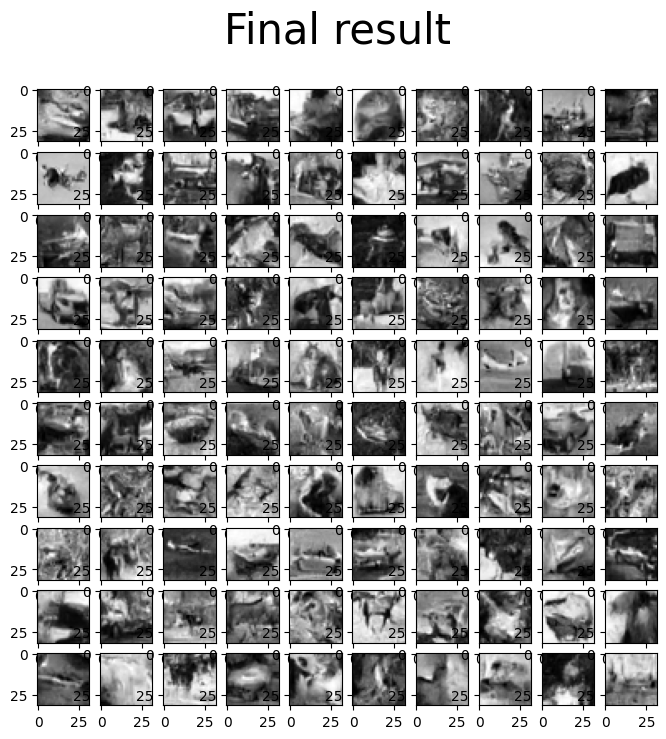

In [15]:
generated_vis = generate_new_images(
        best_model,
        n_samples=100,
        show_metrics_pes_step=False,
        record_gif=True,
        device=device,
        gif_name="../../pictures/cifar_1000.gif",
        c=3, h=32, w=32
    )
show_images(generated_vis, title="Final result")

# N_STEPS = 500

In [5]:
n_steps = 500

ddpm = CustomDiffusionModel(Unet(hw), n_steps=n_steps, min_beta=min_beta, max_beta=max_beta, device=device)
#show_forward(ddpm, train_dataloader, device)

## Train

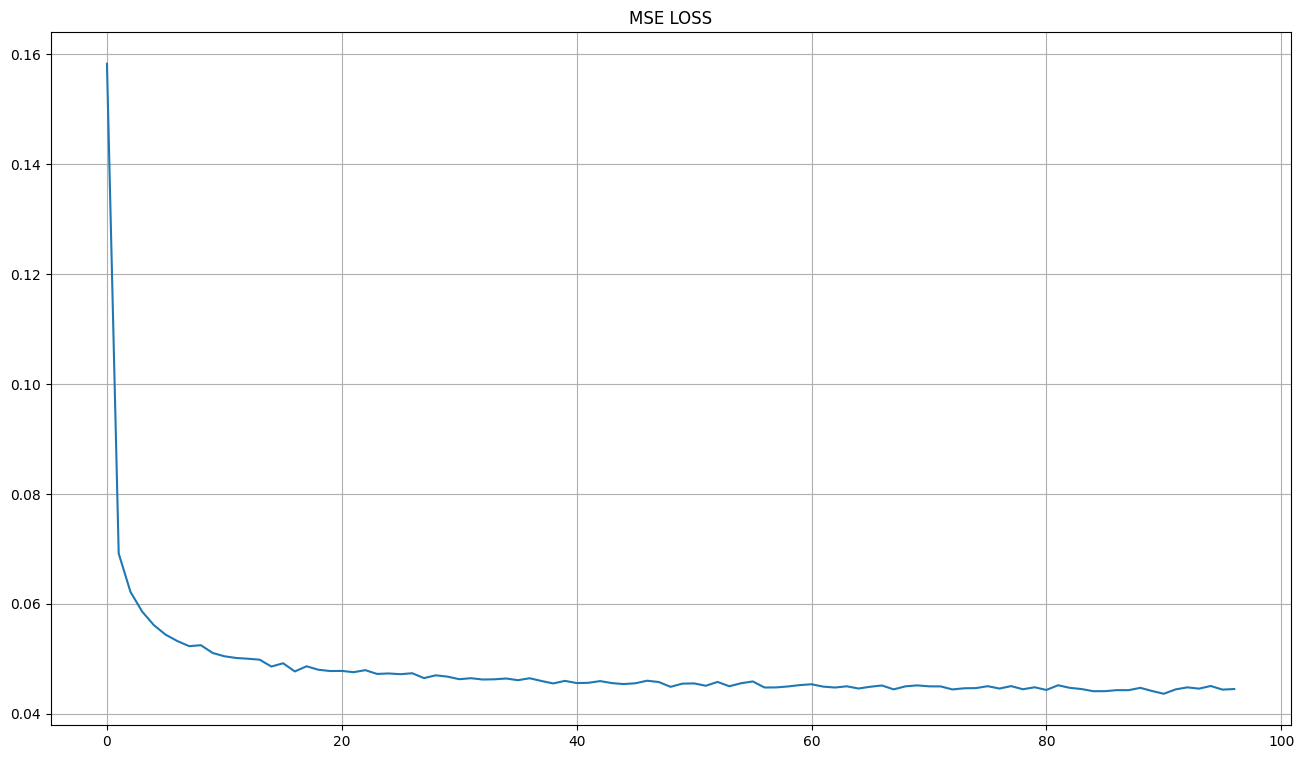

Loss at epoch 97: 0.04449


Epoch 98/100:   0%|          | 0/391 [00:00<?, ?it/s]

Loss at epoch 98: 0.04404


Epoch 99/100:   0%|          | 0/391 [00:00<?, ?it/s]

Loss at epoch 99: 0.04374


Epoch 100/100:   0%|          | 0/391 [00:00<?, ?it/s]

Loss at epoch 100: 0.04505


In [18]:
optimizer = torch.optim.Adam(ddpm.parameters(), lr=2 * 10**(-4))     
training(ddpm, train_dataloader, display=True, n_epochs=100, upset_epoch=4, device=device, optimizer=optimizer, store_path = '../../model_weights/ddpm_cifar_steps_500.pt') 

## Test

In [6]:
store_path = '../../model_weights/ddpm_cifar_steps_500.pt'

best_model = CustomDiffusionModel(Unet(hw), n_steps=n_steps, device=device)
best_model.load_state_dict(torch.load(store_path, map_location=device))
best_model.eval()
print("Model loaded")

Model loaded


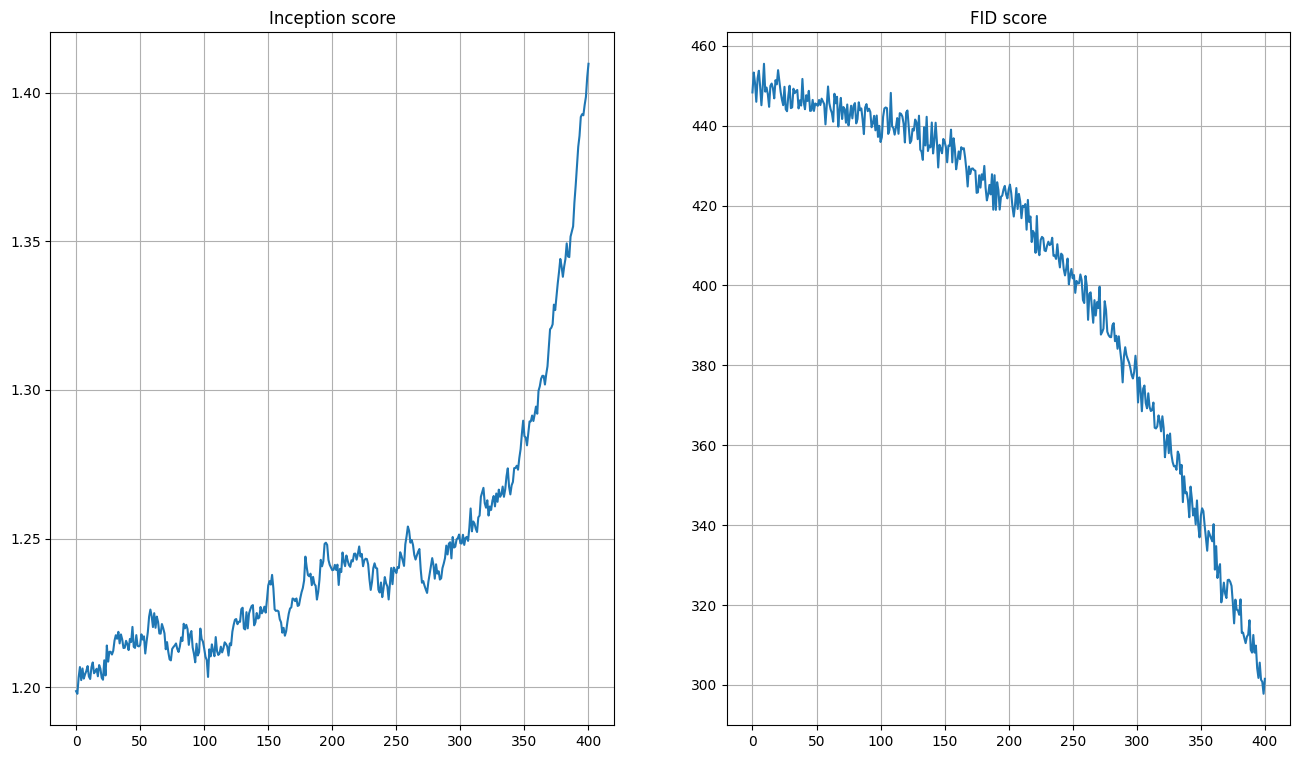

In [20]:
print("Generating new images")
generated = generate_new_images(
        best_model,
        n_samples=1000,
        show_metrics_pes_step=True,
        record_gif=False,
        dataset=dataset,
        device=device,
        gif_name="../../pictures/cifar_500.gif",
        c=3, h=32, w=32
    )
#show_images(generated, title="Final result")

# N_STEPS = 2000

In [5]:
n_steps = 2000

ddpm = CustomDiffusionModel(Unet(hw), n_steps=n_steps, min_beta=min_beta, max_beta=max_beta, device=device)
#show_forward(ddpm, train_dataloader, device)

## Train

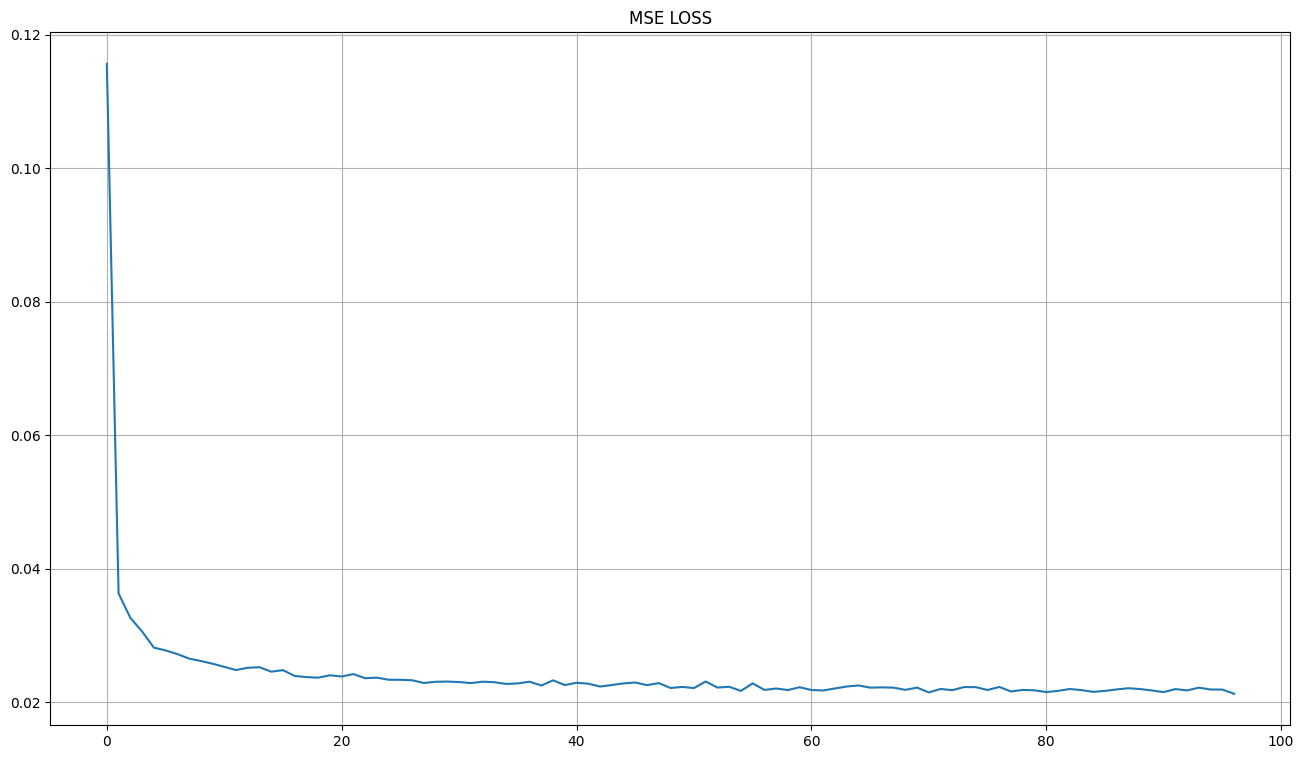

Loss at epoch 97: 0.02128 --> Best model ever (stored)


Epoch 98/100:   0%|          | 0/391 [00:00<?, ?it/s]

Loss at epoch 98: 0.02151


Epoch 99/100:   0%|          | 0/391 [00:00<?, ?it/s]

Loss at epoch 99: 0.02139


Epoch 100/100:   0%|          | 0/391 [00:00<?, ?it/s]

Loss at epoch 100: 0.02173


In [6]:
optimizer = torch.optim.Adam(ddpm.parameters(), lr=2 * 10**(-4))     
training(ddpm, train_dataloader, display=True, n_epochs=100, upset_epoch=4, device=device, optimizer=optimizer, store_path = '../../model_weights/ddpm_cifar_steps_2000.pt') 

## Test

In [7]:
store_path = '../../model_weights/ddpm_cifar_steps_2000.pt'

best_model = CustomDiffusionModel(Unet(hw), n_steps=n_steps, device=device)
best_model.load_state_dict(torch.load(store_path, map_location=device))
best_model.eval()
print("Model loaded")

Model loaded


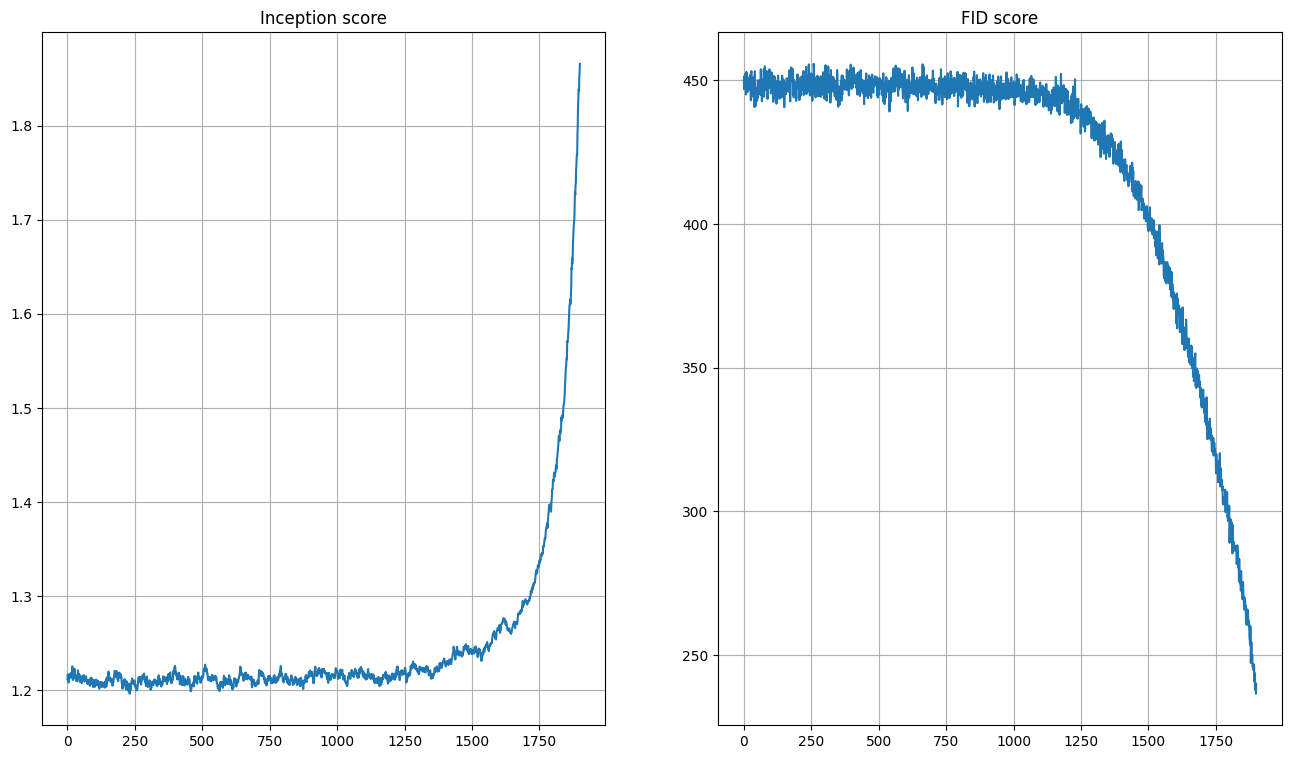

In [8]:
print("Generating new images")
generated = generate_new_images(
        best_model,
        n_samples=1000,
        show_metrics_pes_step=True,
        record_gif=False,
        dataset=dataset,
        device=device,
        gif_name="../../pictures/cifar_2000.gif",
        c=3, h=32, w=32
    )

In [ ]:
generated_viz = generate_new_images(
        best_model,
        n_samples=100,
        show_metrics_pes_step=False,
        record_gif=True,
        dataset=dataset,
        device=device,
        gif_name="../../pictures/cifar_2000.gif",
        c=3, h=32, w=32
    )

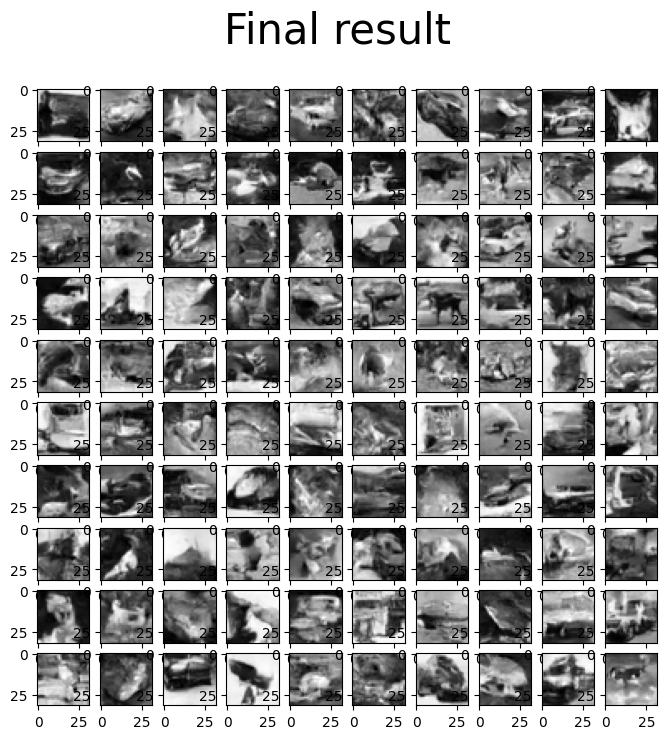

In [11]:
show_images(generated_viz, title="Final result")